<h1>Testing the correlation between track popularity and whether the track is a solo or has a feature</h1>
<h2>Brandon Myers</h2>
<h3>10-8-24</h3>
<strong>I believe that on average, a song with a feature from another artist has a higher popularity score according to spotify.</strong>
This hypothesis could prove that if artists want to reach more people, they should feature other artists on their tracks.

To test this hypothesis I will need to use the Spotify API to get album details, as well as individual track characteristics.
For this I will use the endpoints (https://api.spotify.com/v1/albums/{id}), (https://api.spotify.com/v1/albums/{id}/tracks), and (https://api.spotify.com/v1/tracks?ids={ids}) <br>
The first endpoint I'll use to get album details, such as the title and artist name.<br>
The second endpoint I'll use to get the individual track ids.<br>
The last endpoint I'll use to get individual track info from the album, such as popularity score, artists featured, etc.<br>


I plan to get the average popularity of both solo tracks and feature tracks from a given album. I'll give a list of album ids, and then a dataframe will be made showing the previously discussed characteristics. 
Because I'm handpicking the albums for this, I have to make sure they are fit to be added to the data pool. For the albums I've selected, I've chosen a variety of music genres, and I don't use an artist more than once. Chosen albums must have at least two tracks of each type, solos and features. This ensures I can always get an average of each type of popularity score. Also, it seems that when getting tracks from an album, the api can only handle up to 20, so that should be taken note of. I tried to include albums with less than 20 tracks, but that's easier said than done. Also, popularity is VERY different from artist to artist, I've included bigger and smaller ones for the sake of variety. When I compare popularity, I do it relatively to other tracks in the same album, rather than the rest of the dataset.

First I'll import the required libraries

In [2]:
import pandas as pd
import json
import requests
import base64
import urllib

Now I'll make a function for getting a session token from Spotify so I can make API calls later. I lifted this code from the previous notebooks we did in class.

In [3]:
def get_session_token(SessionID, SessionKey):
    url = 'https://accounts.spotify.com/api/token'
    data = {'grant_type':'client_credentials'}
    encoded_key = base64.b64encode(str(SessionID+ ":" + SessionKey).encode("ascii"))
    header = {'Authorization': 'Basic {}'.format(encoded_key.decode("ascii"))}
    response = requests.post(url, data = data, headers = header)
    print(response.status_code)
    return response.json()['access_token']

Here I'll make the access_token variable to use later in the header for api calls

In [4]:
app_key = pd.read_csv("key.txt")
access_token = get_session_token(app_key["Client_ID"].iloc[0], app_key["Client_Secret"].iloc[0])

200


Here I have the function for making an api call, also from previous in class notebooks

In [5]:
def api_call(endpoint_url, api_header):
    response = requests.get(endpoint_url, headers = api_header)
    print(response.status_code)
    return response.json()

In [6]:
session_header = {'Authorization': 'Bearer {}'.format(access_token)}

Here I'll see what kind of info I can get from this api call. <br>
I used the keys method to get to 'items' which shows me what info I can get from each track. This won't be enough though, I need to use another endpoint for things like popularity values. The only thing I'll use from this endpoint is each ID for the individual tracks.

In [7]:
testalbum = api_call('https://api.spotify.com/v1/albums/1jXYc5gip5tqCTDOotfY5L/tracks', session_header)
testalbum.keys()
test_df = pd.DataFrame(testalbum['items'])
test_df.head()

200


,artists,available_markets,disc_number,duration_ms,explicit,external_urls,href,id,name,preview_url,track_number,type,uri,is_local
0,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,225985,True,{'spotify': 'https://open.spotify.com/track/2d...,https://api.spotify.com/v1/tracks/2dyAiC9k6s0m...,2dyAiC9k6s0mWnMSQRQJGd,Psycho CEO,None,1,track,spotify:track:2dyAiC9k6s0mWnMSQRQJGd,False
1,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,264569,True,{'spotify': 'https://open.spotify.com/track/3b...,https://api.spotify.com/v1/tracks/3bDH7eIQ84QW...,3bDH7eIQ84QWdBeWwffUZD,Power Trip,None,2,track,spotify:track:3bDH7eIQ84QWdBeWwffUZD,False
2,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,170847,True,{'spotify': 'https://open.spotify.com/track/5N...,https://api.spotify.com/v1/tracks/5NAOhPAZ57eF...,5NAOhPAZ57eFAXr3qatS6i,Breathe,None,3,track,spotify:track:5NAOhPAZ57eFAXr3qatS6i,False
3,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,165400,True,{'spotify': 'https://open.spotify.com/track/7K...,https://api.spotify.com/v1/tracks/7KdQOqCspznO...,7KdQOqCspznOjPDT0KAnuq,Morë,None,4,track,spotify:track:7KdQOqCspznOjPDT0KAnuq,False
4,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,178285,True,{'spotify': 'https://open.spotify.com/track/5B...,https://api.spotify.com/v1/tracks/5Bno6wFa22tR...,5Bno6wFa22tRbFUwh4iZdk,Bought The Earth,None,5,track,spotify:track:5Bno6wFa22tRbFUwh4iZdk,False


I know I want to make a function to do this automatically later, but for now I need to figure out what that would look like, and if it would work. I use the ids from the previous dataframe to make a list, to make an api call to receive all the tracks from an album at once, but this time, with greater detail. Here I'll get an average of the popularity of both solos and features

In [8]:
track_ids = ','.join(test_df['id'].to_list())

track_list = api_call('https://api.spotify.com/v1/tracks?ids=' + track_ids, session_header)
track_list_df = pd.DataFrame(track_list['tracks'])

average_solo = int();
average_ft = int();
solo_ct = 0;
ft_ct = 0;
#I figured I could use len(track_list_df['artists'][x] to see how many elements were in the object,
#I'll use this to determine whether or not a track is a solo or has a feature

for x in range(len(track_list_df)): 
    if len(track_list_df['artists'][x]) > 1:
        average_ft+= track_list_df['popularity'][x]
        ft_ct+= 1
    else:
        average_solo+= track_list_df['popularity'][x]
        solo_ct+= 1

average_ft/= ft_ct
average_solo/= solo_ct

print(average_ft)
print(average_solo)



200
55.5
54.22222222222222


Now I'll use what I just tested to make a proper function that takes an album ID as an input, to make compiling a set of data much easier.

In [9]:
def average(albumid):
    #I'll use this to get the track ids from album like before
    album = api_call('https://api.spotify.com/v1/albums/' + albumid + '/tracks', session_header)
    album_df = pd.DataFrame(album['items'])
    ids = ','.join(album_df['id'].to_list())

    #I'll use this endpoint to get the album title and artist name
    album2 = api_call('https://api.spotify.com/v1/albums/' + albumid, session_header)
    artist = pd.DataFrame(album2['artists'])['name'][0]
    title = album2['name']
    
    #This gives me the list of tracks from the album and all their details
    tracks = api_call('https://api.spotify.com/v1/tracks?ids=' + ids, session_header)
    tracks_df = pd.DataFrame(tracks['tracks'])

    #I'll initialize some variables because I'll be adding to them in the loop
    average_solo = int();
    average_ft = int();
    solo_ct = 0;
    ft_ct = 0;

    #Now I'll loop through the tracks, adding up the popularities based on what kind of song it is,
    #as well as how many of each kind appear
    for x in range(len(tracks_df)): 
        if len(tracks_df['artists'][x]) > 1:
            average_ft+= tracks_df['popularity'][x]
            ft_ct+= 1
        else:
            average_solo+= tracks_df['popularity'][x]
            solo_ct+= 1

    #Now because I need the average, I'll divide the sums from the total of each
    average_ft/= ft_ct
    average_solo/= solo_ct
    
    #I'll also get the avg popularity of the album because why not
    average_ttl = (average_ft + average_solo) / 2

    #If this ratio is less than 1, features are more popular, if greater than 1, solos are more popular
    ratio = average_solo / average_ft

    #Now I want to return a dataframe, so I'll make one with everything I've just collected.
    data = {'Title': [title],
            'Artist': [artist],
            'Solo_Count': [solo_ct],
            'Feature_Count': [ft_ct],
            'Avg_Solo_Pop': [average_solo],
            'Avg_Feature_Pop': [average_ft],
            'Avg_Total_Pop': [average_ttl],
            'Ratio': [ratio],
            'Ft_More_Pop': [str(ratio < 1)]}
    
    return(pd.DataFrame(data=data))

I'll make sure it works for a single album

In [10]:
average('72K9c2D3M69XFFVKiIZuUU')

200
200
200


,Title,Artist,Solo_Count,Feature_Count,Avg_Solo_Pop,Avg_Feature_Pop,Avg_Total_Pop,Ratio,Ft_More_Pop
0,COA,ericdoa,9,2,33.333333,34.5,33.916667,0.966184,True


Here I'll list out all my album ids I want to use in this test, making it easy to add more if I want a greater scope of data

In [11]:
albumstoadd = ['1jXYc5gip5tqCTDOotfY5L',
               '72K9c2D3M69XFFVKiIZuUU',
               '4eLPsYPBmXABThSJ821sqY',
               '2uoD60Oip7rq3vjXxZ2VaD',
               '2QRedhP5RmKJiJ1i8VgDGR',
               '4gfPAEkUvCJJikyRW9GoSy',
               '7c60QdnpXI2efwnUaIzQSu',
               '2ra2X7TUtBwu4cbp1rYQYz',
               '7AJPV0L05IyIBid97AvwVD',
               '2ODvWsOgouMbaA5xf0RkJe',
               '6n9DKpOxwifT5hOXtgLZSL',
               '1U2atfLjw1MKte54JUjcQR',
               '4yUqNSK6jMi7Y6eWl03U5r',
               '40GMAhriYJRO1rsY4YdrZb',
               '13rZDYWdAeJumf6UYYBdcL',
               '2pOEFqvfxp5uUQ8vQEmVA0',
               '7kkWu2etRnJCM6HX7JzhuK',
               '4mvxoogQn8p84Wz17zTHnJ',
               '2nkto6YNI4rUYTLqEwWJ3o',
               '7tWP3OG5dWphctKg4NMACt',
               '0FzWvaeMBfKBCqxHTLVlB8',
               '1ezs1QD5SYQ6LtxpC9y5I2']

Now I'll loop through that list, running the function I created and concatonating each dataframe to the previous.

In [12]:
compiled = None;

for x in albumstoadd:
    compiled = pd.concat([compiled,average(x)], ignore_index=True)

200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200


I'll sort these by the ratio, remember, if its less than 1, features are on average more popular. The farther that ratio is from 1, the greater the disparity between popularity values.

In [13]:
compiled.sort_values('Ratio', ascending=True)

,Title,Artist,Solo_Count,Feature_Count,Avg_Solo_Pop,Avg_Feature_Pop,Avg_Total_Pop,Ratio,Ft_More_Pop
19,Quest For Fire,Skrillex,2,13,35.500000,50.153846,42.826923,0.707822,True
11,All I Ever Want Is Everything,Blu DeTiger,12,2,22.583333,30.000000,26.291667,0.752778,True
14,LIFE'S A TRIP,Trippie Redd,11,3,50.454545,64.666667,57.560606,0.780225,True
7,moreno fm,again&again,11,3,24.000000,29.000000,26.500000,0.827586,True
3,SCRAPYARD,Quadeca,13,2,41.692308,49.000000,45.346154,0.850863,True
10,Legends Never Die,Juice WRLD,15,5,59.866667,67.400000,63.633333,0.888229,True
15,Heaven knows,PinkPantheress,9,4,53.111111,59.750000,56.430556,0.888889,True
9,Starboy,The Weeknd,13,5,64.461538,72.400000,68.430769,0.890353,True
18,Flower Boy,"Tyler, The Creator",5,9,61.600000,68.555556,65.077778,0.898541,True
20,MEGAN,Megan Thee Stallion,12,6,54.333333,58.666667,56.500000,0.926136,True


By looking at the dataframe above, you can see that features tend to be more popular. Below, I've also put the mean and median values below. Both the mean and median for the Ratio are less than 1, by over 5%

In [14]:
compiled.mean(numeric_only=True)

Solo_Count         10.636364
Feature_Count       4.409091
Avg_Solo_Pop       49.626890
Avg_Feature_Pop    53.394367
Avg_Total_Pop      51.510628
Ratio               0.929420
dtype: float64

In [15]:
compiled.median(numeric_only=True)

Solo_Count         11.000000
Feature_Count       3.000000
Avg_Solo_Pop       53.666667
Avg_Feature_Pop    55.416667
Avg_Total_Pop      55.332071
Ratio               0.945486
dtype: float64

<h3>Overall, I'd say this data proves my hypothesis, and songs that have a feature are more popular than ones that do not.</h3>

<h2>Some things to consider</h2>
The majority of these albums have less features than solos, that could play into the data shown. <br>
Spotify has a limit of 20 tracks per album, some tracks might have been cut off and not factored into the data. <br>
This data only contains a single album each from around 20 or so artists, a more comprehensive dataset would include all of their songs. <br>
Also these are only artists I know of, while I tried to include a variety, it could definitely be more broad.

I used the pandas documentation to help me quite a lot across this project as well as the Spotify developer API.

<h1>/// Analysis Below ///</h1>

In [44]:
from matplotlib import pyplot as plt

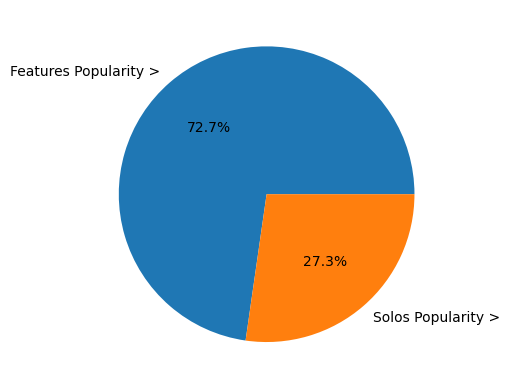

Ft_More_Pop
True     16
False     6
Name: count, dtype: int64

In [46]:
fig2, ax2 = plt.subplots(1)
ax2.pie(compiled['Ft_More_Pop'].value_counts(), labels = ['Features Popularity >','Solos Popularity >'], autopct='%1.1f%%')

plt.show()

compiled['Ft_More_Pop'].value_counts()

Here's a quick pie chart showing the percentage of Albums where features are more popular vs solos

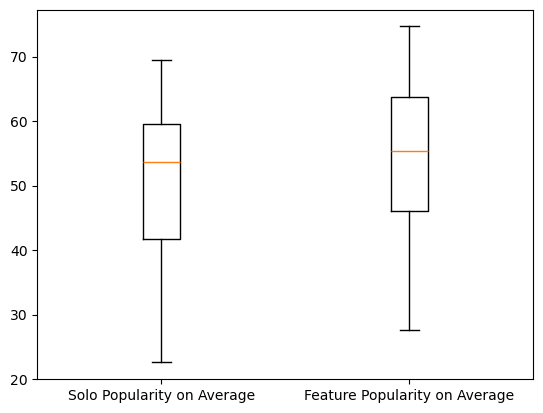

In [19]:
fig3, ax3 = plt.subplots()
ax3.boxplot([compiled['Avg_Solo_Pop'],compiled['Avg_Feature_Pop']], tick_labels = ['Solo Popularity on Average','Feature Popularity on Average'])

plt.show()

I like this box plot to see the difference between solo popularity and feature popularity, it's interesting that the median is actually really close, but the features are more popular in every metric

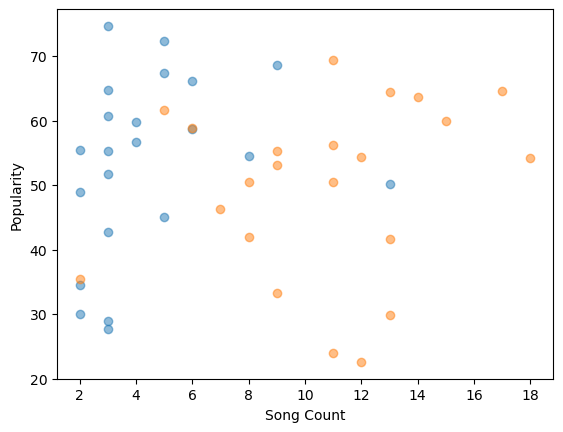

In [42]:
fig5, ax5 = plt.subplots()
ax5.scatter(compiled['Feature_Count'],compiled['Avg_Feature_Pop'],alpha = 0.5)
ax5.scatter(compiled['Solo_Count'],compiled['Avg_Solo_Pop'],alpha = 0.5)
ax5.set_xlabel('Song Count')
ax5.set_ylabel('Popularity')
plt.show()

I wanted to see if there was any real correlation between the amount of a certain song type and how popular they are, it doesn't look like there is any. But then again this isn't relative to the artist's popularity, if it was it might be a different story.

Overall I think these are some good visuals but they don't tell me a whole lot that I didn't know before, if I had kept more raw data on individual songs from the requests I could have some better graphs, but reworking my notebook to do that is more work than I have time for right now sadly.